In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, classification_report, precision_recall_curve, confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import graphviz
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


###### drop last two columns

In [3]:
# remove the two naive_bayes... columns
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
#seems no null values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

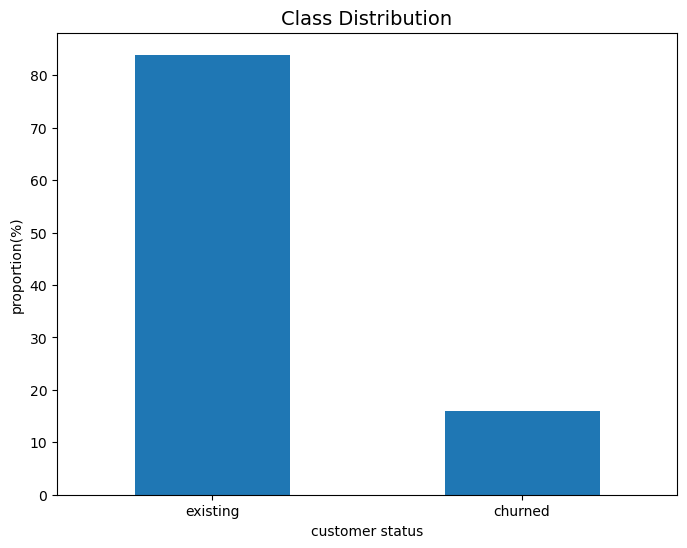

In [5]:
g = df.Attrition_Flag.value_counts(normalize=True)*100

plt.figure(figsize=(8, 6))
ax = g.plot(kind='bar')

plt.ylabel("proportion(%)")
plt.xlabel("customer status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.title('Class Distribution', fontsize=14)
plt.xticks([0, 1], ['existing', 'churned'], rotation=0)

plt.show()

In [6]:
# 'Unknown' shows up in 3 features
for col in df.columns:
    if df[col].dtype == 'O':
        print(col, df[col].unique())
        print(df[col].value_counts())
        print()

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Gender ['M' 'F']
F    5358
M    4769
Name: Gender, dtype: int64

Education_Level ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']
Blue     

###### 3046 instances with 'Unknown' values

In [7]:
df[(df=='Unknown').any(axis=1)].shape

(3046, 21)

###### nothing unusual in the numerical features

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<Figure size 800x600 with 0 Axes>

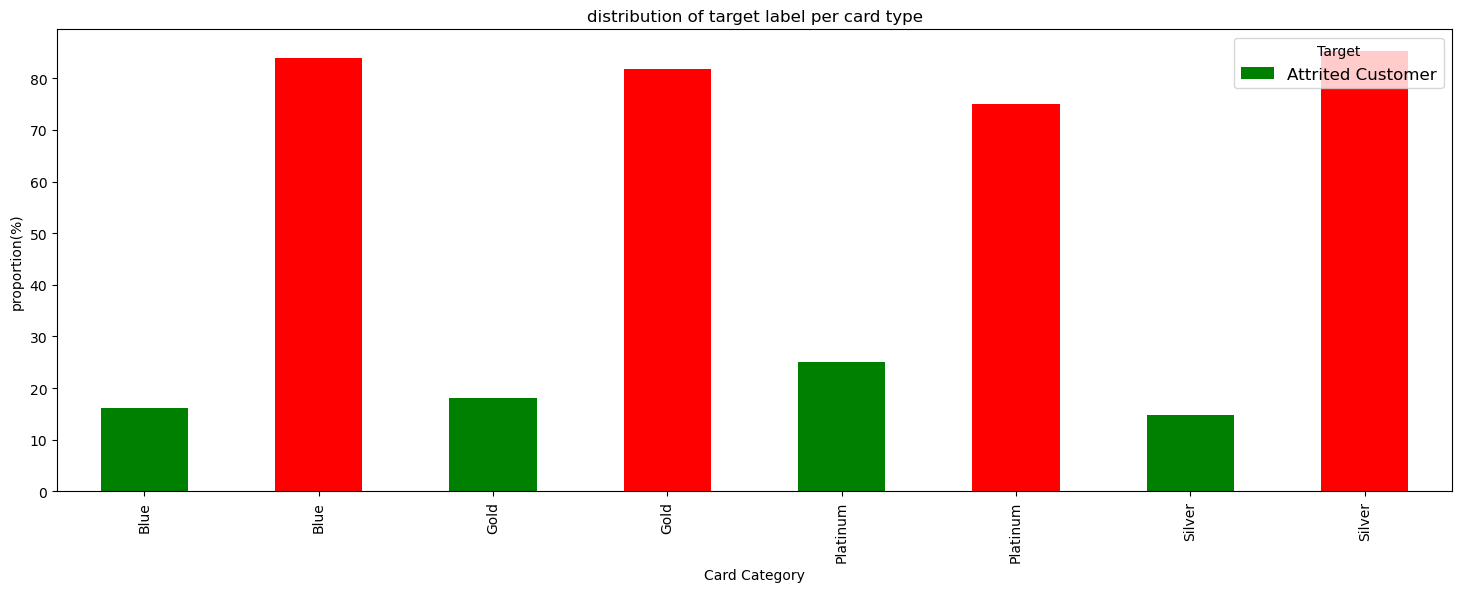

In [9]:
g = df.groupby(['Card_Category', 'Attrition_Flag']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='proportion')

plt.figure(figsize=(8, 6))
colors = {'churned': 'green', 'exists': 'red'}
color_list = [colors[label] for label in ['churned', 'exists']]

ax = g.plot(kind='bar', x='Card_Category', y='proportion', color=color_list, legend=False)

# add the legend with increased font size and repositioned
ax.legend(labels=g['Attrition_Flag'].unique(), title='Target', fontsize=12, loc='upper right')
plt.ylabel("proportion(%)")
plt.xlabel("Card Category")
plt.title("distribution of target label per card type")
# set the figure size using set_size_inches method
fig = ax.get_figure()
fig.set_size_inches(18, 6)

plt.show()

In [10]:
df.Attrition_Flag.value_counts(normalize = True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [11]:
df.shape

(10127, 21)

In [12]:
len(df.CLIENTNUM.unique())

10127

In [13]:
df.dtypes.value_counts()

int64      10
object      6
float64     5
dtype: int64

In [14]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [15]:
df.Attrition_Flag.replace({'Existing Customer': 0, 'Attrited Customer':1}, inplace= True)

CLIENTNUM are all unique categorical values that provide no relevant information for our use case so we drop them

In [16]:
df.drop('CLIENTNUM', axis = 1, inplace = True)

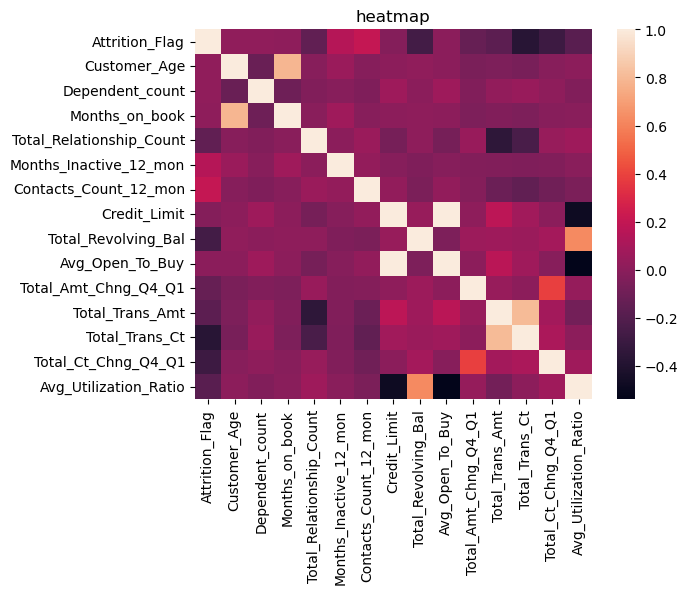

In [17]:
sns.heatmap(df.corr())
plt.title("heatmap")
plt.show()

In [18]:
data_encoded = pd.get_dummies(df).drop(['Education_Level_Unknown', 'Marital_Status_Unknown', 'Income_Category_Unknown'], axis= 1)
data_encoded.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,1,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,1,0,0,0


In [19]:
data_encoded.corr().loc[:, ['Attrition_Flag']].sort_values(by = 'Attrition_Flag')[:-1]

,Attrition_Flag
Total_Trans_Ct,-0.371403
Total_Ct_Chng_Q4_Q1,-0.290054
Total_Revolving_Bal,-0.263053
Avg_Utilization_Ratio,-0.178410
Total_Trans_Amt,-0.168598
Total_Relationship_Count,-0.150005
Total_Amt_Chng_Q4_Q1,-0.131063
Gender_M,-0.037272
Income_Category_$60K - $80K,-0.028221
Credit_Limit,-0.023873


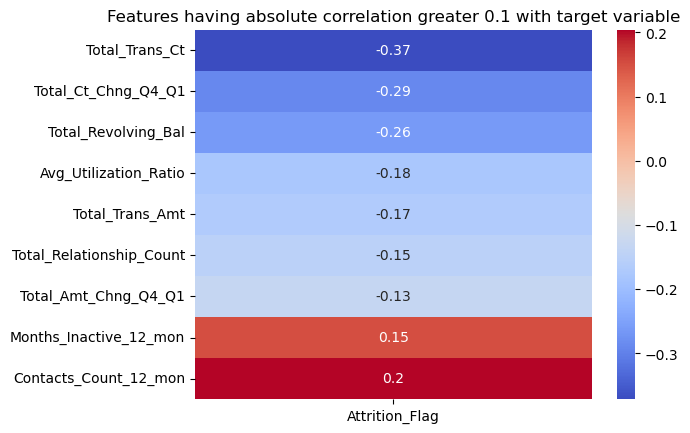

In [20]:
corr = data_encoded.corr()[['Attrition_Flag']]

# plot the correlation matrix using heatmap
sns.heatmap(corr.loc[corr['Attrition_Flag'].abs()>0.1].sort_values('Attrition_Flag')[:-1], annot=True, cmap='coolwarm')

plt.title("Features having absolute correlation greater 0.1 with target variable")
# show the plot
plt.show()

In [21]:
(data_encoded['Total_Revolving_Bal'] + data_encoded['Avg_Open_To_Buy'] == data_encoded['Credit_Limit']).sum()

10127

In [22]:
(data_encoded['Avg_Utilization_Ratio'] == round(data_encoded['Total_Revolving_Bal']/data_encoded['Credit_Limit'],3)).sum()

10127

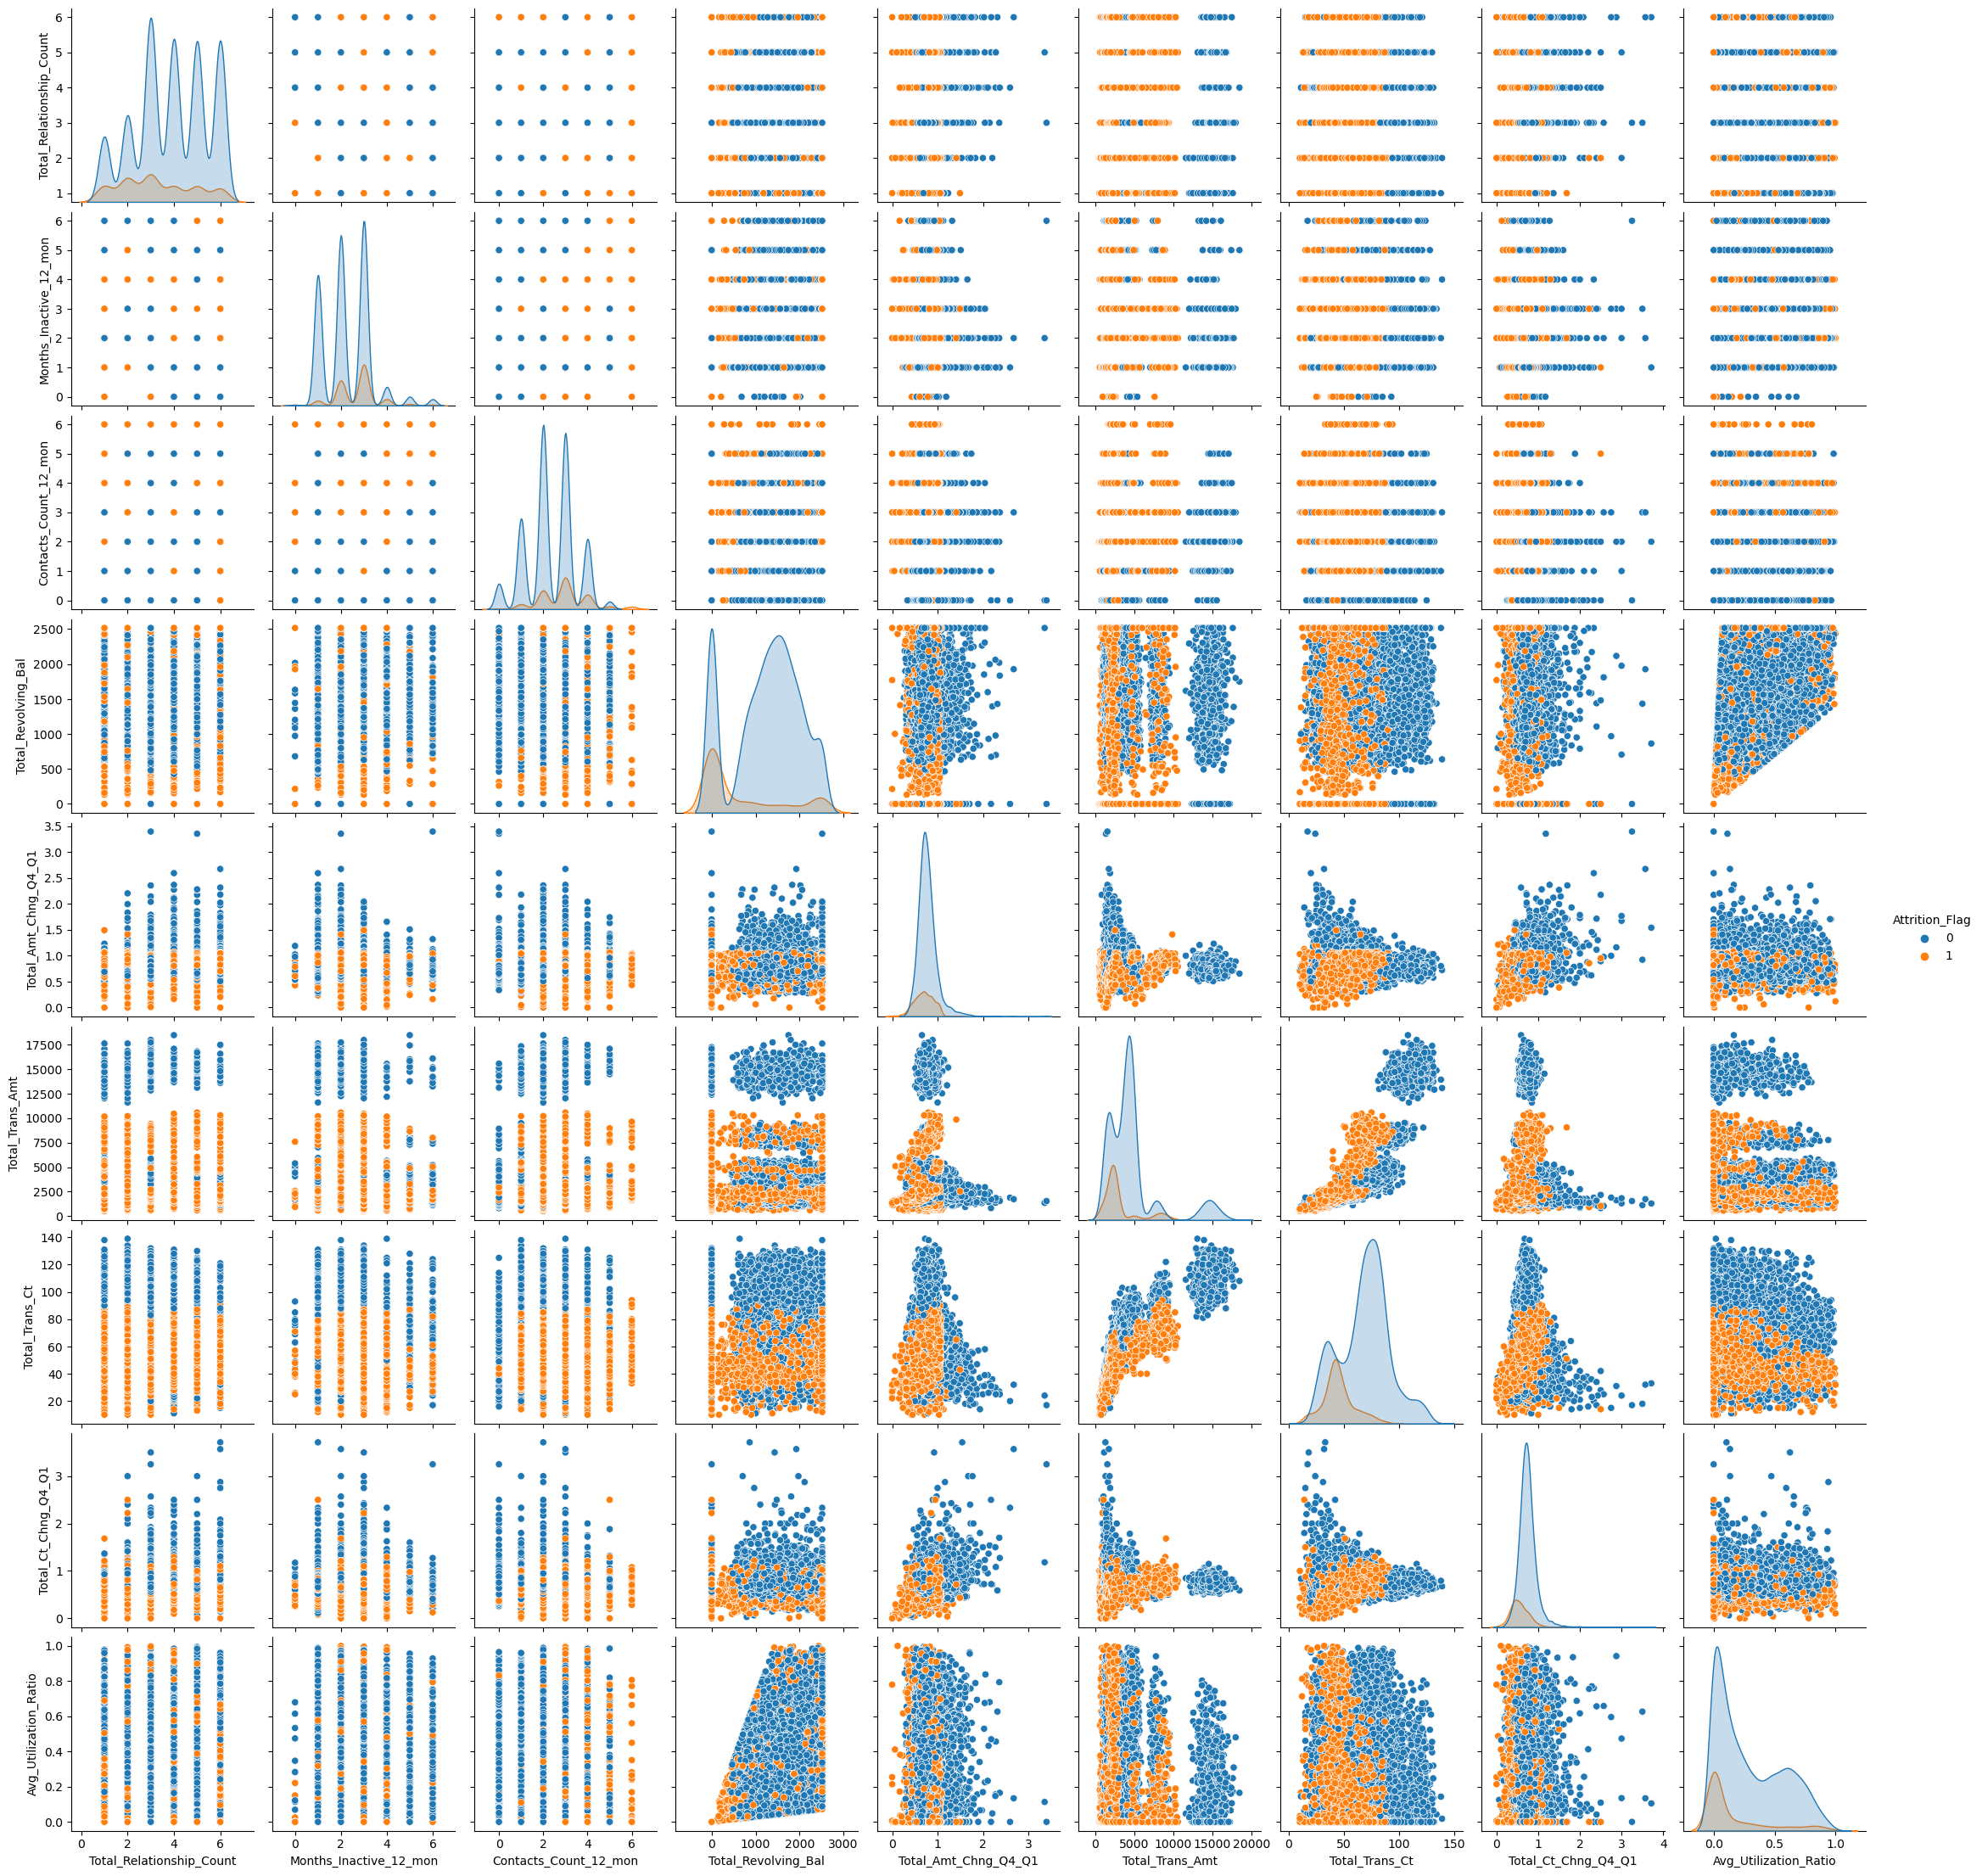

In [23]:
# features having absolute correlation greater than 0.1
g_1 = corr.loc[corr['Attrition_Flag'].abs()>0.1].index

sns.pairplot(df.loc[:, g_1], hue="Attrition_Flag", height=2.5)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded.drop('Attrition_Flag', axis=1), data_encoded.Attrition_Flag,test_size=0.2, random_state=26, stratify = data_encoded.Attrition_Flag)

In [25]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(data = ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

### decision tree

In [26]:
# Create a parameter grid to search over
param_grid = {
    
    'max_depth': [None] +[i for i in range(1,20)]
}

# Create a GridSearchCV object and fit it to the data
clf_tree = DecisionTreeClassifier(random_state = 26)
grid_search = GridSearchCV(clf_tree, param_grid,  cv=5, scoring = 'f1', n_jobs=10)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator and its corresponding f1-score on the test data
best_clf_tree = grid_search.best_estimator_
y_pred_tree = best_clf_tree.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1701
           1       0.82      0.79      0.80       325

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026



In [27]:
best_clf_tree

DecisionTreeClassifier(max_depth=7, random_state=26)

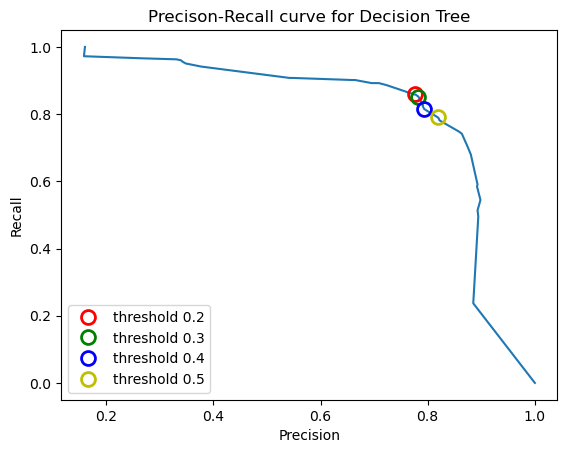

In [28]:
precision, recall, thresholds = precision_recall_curve(
    y_test, best_clf_tree.predict_proba(X_test_scaled)[:, 1])

plt.plot(precision, recall)

threshold_values = [0.2, 0.3, 0.4, 0.5]
colors = ['r', 'g', 'b', 'y']

for threshold, color in zip(threshold_values, colors):
    close_default = np.argmin(np.abs(thresholds - threshold))
    plt.plot(precision[close_default], recall[close_default], 'o', c=color,
             markersize=10, label=f"threshold {threshold}", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Precison-Recall curve for Decision Tree")
plt.show()

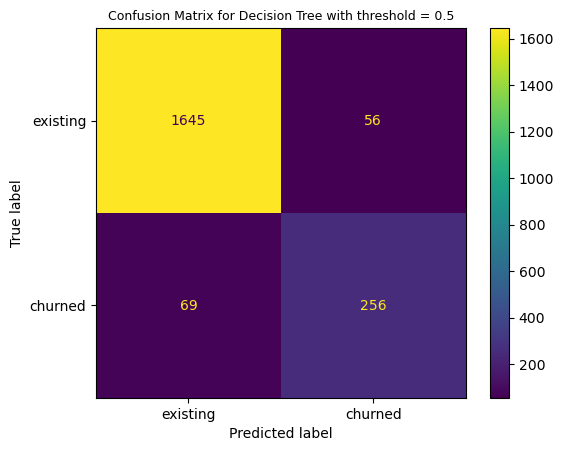

In [29]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=["existing", "churned"])

disp.plot()
plt.title('Confusion Matrix for Decision Tree with threshold = 0.5', fontsize=9)
# plt.savefig('decision tree confusion matrix.png', bbox_inches='tight')
plt.show()

In [30]:
y_pred_tree_2 = best_clf_tree.predict_proba(X_test_scaled)[:,1] > 0.3
print(classification_report(y_test, y_pred_tree_2))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1701
           1       0.78      0.85      0.82       325

    accuracy                           0.94      2026
   macro avg       0.88      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026



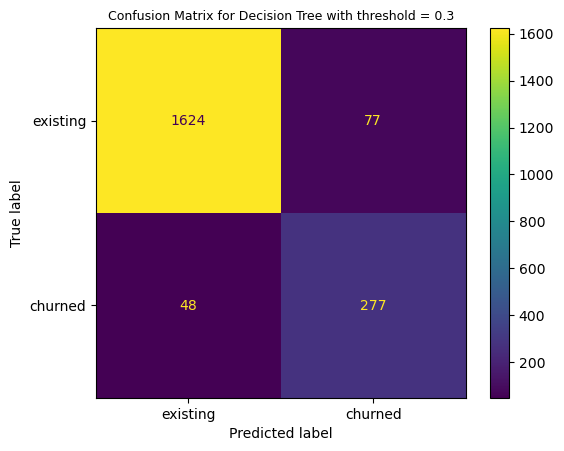

In [31]:
cm_tree_2 = confusion_matrix(y_test, y_pred_tree_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree_2,display_labels=["existing", "churned"])

disp.plot()
plt.title('Confusion Matrix for Decision Tree with threshold = 0.3', fontsize=9)
# plt.savefig('decision tree confusion matrix.png', bbox_inches='tight')
plt.show()

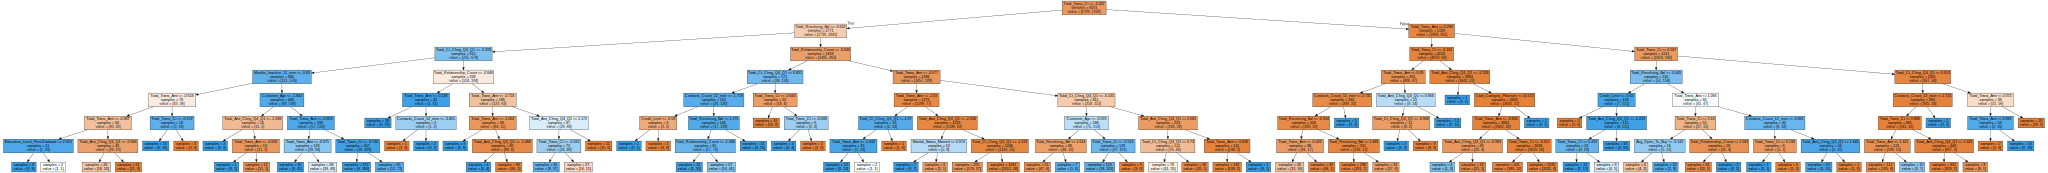

In [32]:
export_graphviz(best_clf_tree, out_file="tree.dot",
                feature_names=X_train.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

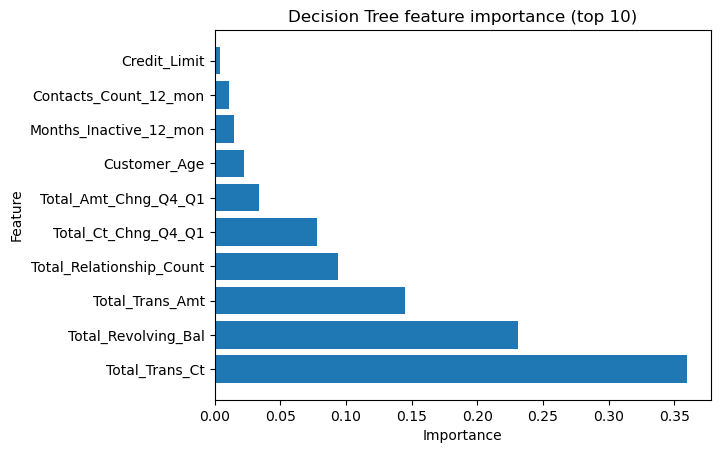

In [33]:
importances = best_clf_tree.feature_importances_
indices = importances.argsort()[::-1]
top_features = X_train.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot feature importances
plt.barh(top_features, top_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree feature importance (top 10)")
plt.show()

### random forest

In [34]:
%%time

param_grid = {
    
    'max_depth': [None] +[i for i in range(1,20)],
    'n_estimators': [100, 200, 300]
}



forest = RandomForestClassifier(random_state=26, n_jobs=10)
grid_search = GridSearchCV(forest, param_grid,  cv=5, scoring = 'f1', n_jobs=10)
grid_search.fit(X_train_scaled, y_train)

forest = grid_search.best_estimator_

y_pred_forest = forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0.90      0.78      0.84       325

    accuracy                           0.95      2026
   macro avg       0.93      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Wall time: 1min 12s


In [35]:
forest

RandomForestClassifier(max_depth=18, n_jobs=10, random_state=26)

In [36]:
y_pred_forest_4 = forest.predict_proba(X_test_scaled)[:,1] > 0.4
print(classification_report(y_test, y_pred_forest_4))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1701
           1       0.86      0.87      0.86       325

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



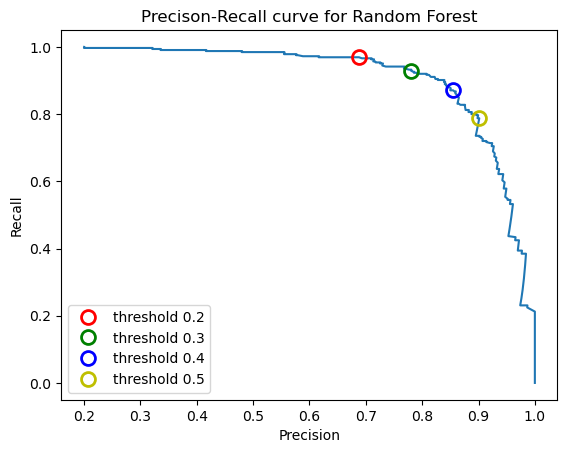

In [37]:
precision, recall, thresholds = precision_recall_curve(
    y_test, forest.predict_proba(X_test_scaled)[:, 1])

plt.plot(precision, recall)

threshold_values = [0.2, 0.3, 0.4, 0.5]
colors = ['r', 'g', 'b', 'y']

for threshold, color in zip(threshold_values, colors):
    close_default = np.argmin(np.abs(thresholds - threshold))
    plt.plot(precision[close_default], recall[close_default], 'o', c=color,
             markersize=10, label=f"threshold {threshold}", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Precison-Recall curve for Random Forest")
plt.show()

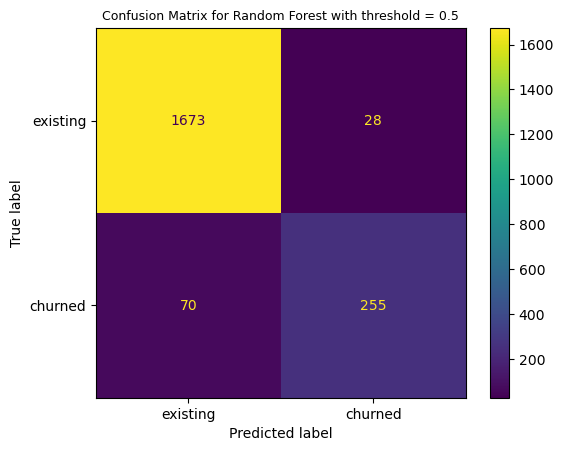

In [38]:
cm_forest = confusion_matrix(y_test, y_pred_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest,display_labels=["existing", "churned"])

disp.plot()
plt.title('Confusion Matrix for Random Forest with threshold = 0.5', fontsize=9)
plt.show()

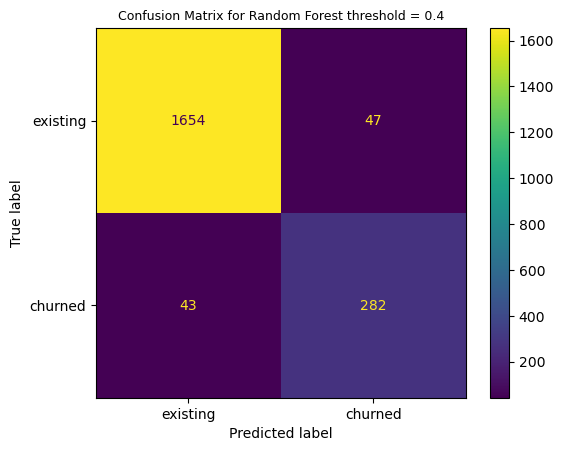

In [39]:
cm_forest_4 = confusion_matrix(y_test, y_pred_forest_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest_4,display_labels=["existing", "churned"])

disp.plot()
plt.title('Confusion Matrix for Random Forest threshold = 0.4', fontsize=9)
plt.show()

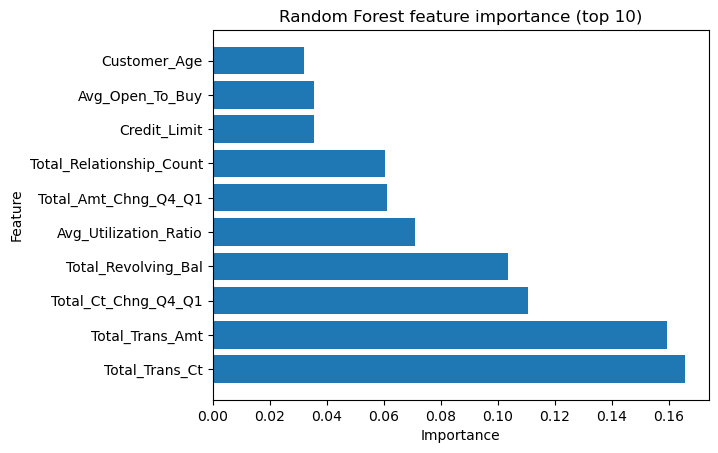

In [40]:
importances = forest.feature_importances_
indices = importances.argsort()[::-1]
top_features = X_train_scaled.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot feature importances
plt.barh(top_features, top_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest feature importance (top 10)")
plt.show()

### xgboost

In [41]:
%%time

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
}

# initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=26, n_jobs=10)

# initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=10)

# fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# print the best parameters and F1-score
print('Best parameters: ', grid_search.best_params_)
print('Best F1-score: {:.2f}'.format(grid_search.best_score_))

# evaluate the best model on the test data
best_model_xgb = grid_search.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_xgb))

Best parameters:  {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
Best F1-score: 0.91
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1701
           1       0.93      0.91      0.92       325

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.98      0.98      0.98      2026

Wall time: 1min 49s


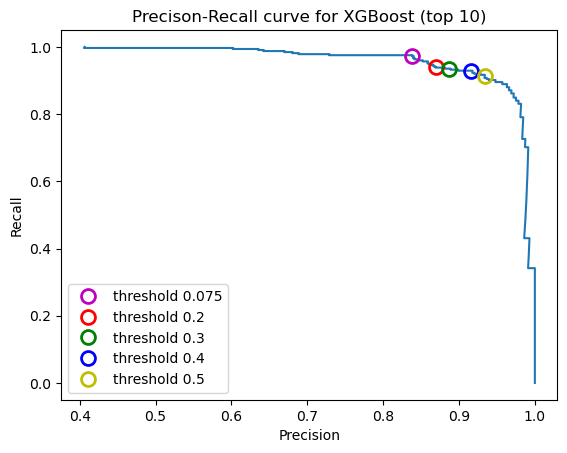

In [42]:
precision, recall, thresholds = precision_recall_curve(
    y_test, best_model_xgb.predict_proba(X_test_scaled)[:, 1])

plt.plot(precision, recall)

threshold_values = [0.075, 0.2, 0.3, 0.4, 0.5]
colors = ['m', 'r', 'g', 'b', 'y']

for threshold, color in zip(threshold_values, colors):
    close_default = np.argmin(np.abs(thresholds - threshold))
    plt.plot(precision[close_default], recall[close_default], 'o', c=color,
             markersize=10, label=f"threshold {threshold}", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Precison-Recall curve for XGBoost (top 10)")
plt.show()

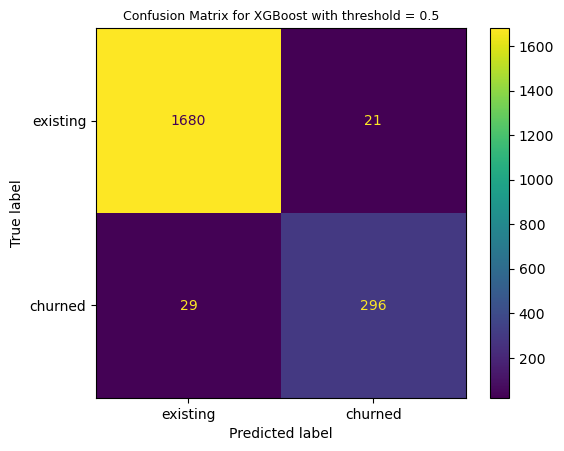

In [43]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=["existing", "churned"])

disp.plot()
plt.title('Confusion Matrix for XGBoost with threshold = 0.5', fontsize=9)

plt.show()

In [44]:
y_pred_xgb_3 = best_model_xgb.predict_proba(X_test_scaled)[:,1] > 0.075
print(classification_report(y_test, y_pred_xgb_3))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1701
           1       0.84      0.97      0.90       325

    accuracy                           0.97      2026
   macro avg       0.92      0.97      0.94      2026
weighted avg       0.97      0.97      0.97      2026



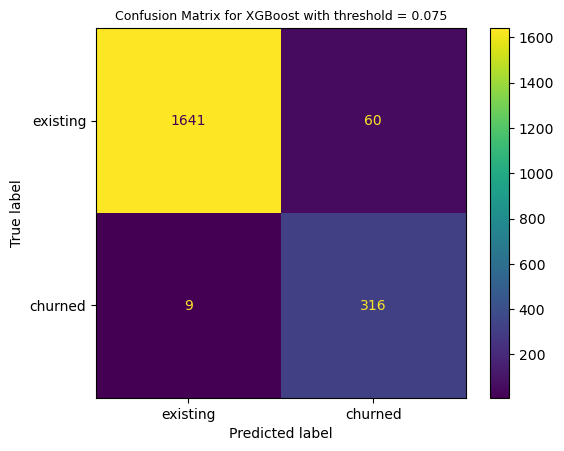

In [45]:
cm_xgb_3 = confusion_matrix(y_test, y_pred_xgb_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_3,display_labels=["existing", "churned"])

disp.plot()
plt.title('Confusion Matrix for XGBoost with threshold = 0.075', fontsize=9)

plt.show()

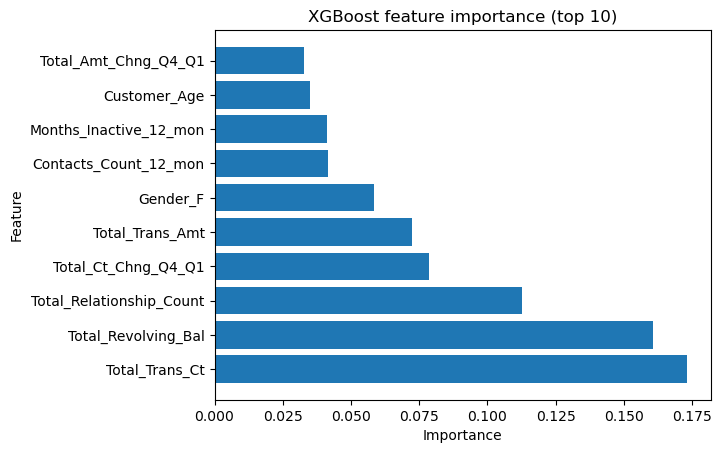

In [46]:
importances = best_model_xgb.feature_importances_
indices = importances.argsort()[::-1]
top_features = X_train_scaled.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot feature importances
plt.barh(top_features, top_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("XGBoost feature importance (top 10)")
plt.show()